In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:

# Load the data
df = pd.read_csv(r"D:\University\Aalto\Project_course\Dataset\db1bcg\s17.csv")

# Define categories of columns
metadata_cols = ['Age', 'Height', 'Weight', 'Gender', 'CF_dist', 'fs']
pulse_wave_cols = ['tonc_mean', 'tonf_mean', 'bcg_mean']
beatwise_cols = ['RR', 'HR', 'pattonc', 'pattonf', 'ptt_cf', 'RI', 'RJ', 'RK', 'IJ', 'AI', 'AJ', 'AK']

# Extract metadata (first row only for subject info)
metadata_df = df.loc[0, metadata_cols].to_frame().T
metadata_df.reset_index(drop=True, inplace=True)

# Extract beat-wise parameters (these appear to be on each row)
beatwise_df = df[beatwise_cols].copy()
#the data frame has NAN values up untill the 600th row, we dont need these NaN values so lets drop them
beatwise_df.dropna(subset=['RR'], inplace=True)

# Fill NaN values in beat-wise parameters (if any)
#beatwise_df.fillna(method='ffill', inplace=True)

# Extract pulse wave signals
pulse_wave_df = df[pulse_wave_cols].copy()


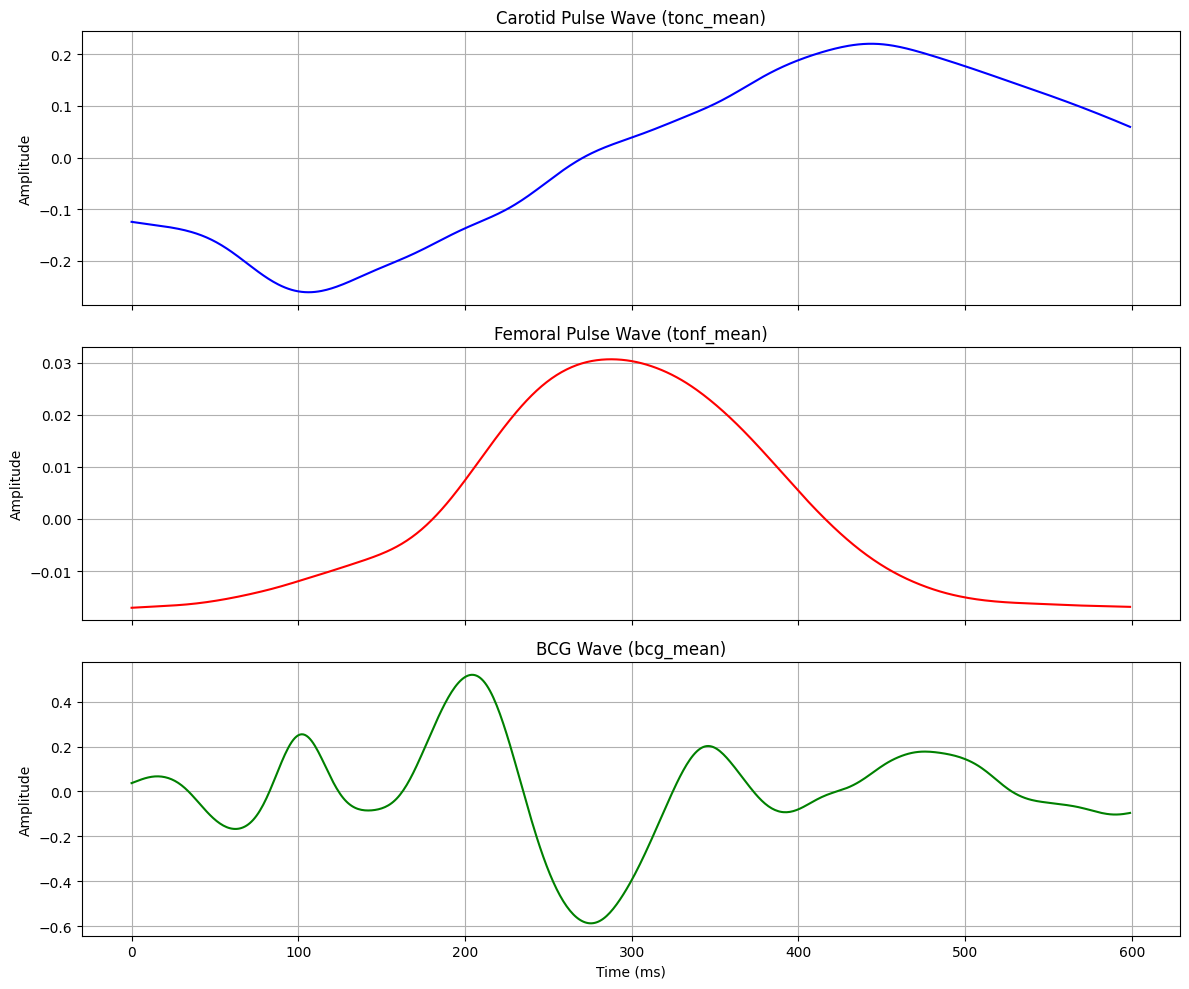

Sampling frequency: 1000.0 Hz
Number of samples in pulse waves: 600
Duration of pulse waves: 0.60 seconds (600.0 ms)


In [12]:
# Extract metadata (first row only for subject info)
metadata_df = df.loc[0, metadata_cols].to_frame().T
metadata_df.reset_index(drop=True, inplace=True)

# Extract beat-wise parameters
beatwise_df = df[beatwise_cols].copy()
beatwise_df.dropna(subset=['RR'], inplace=True)

# Extract pulse wave signals
pulse_wave_df = df[pulse_wave_cols].copy()

# Get sampling frequency
fs = metadata_df['fs'].iloc[0]

# Create time vector for pulse wave signals (assuming 600ms window as mentioned in your description)
time_ms = np.arange(0, len(pulse_wave_df)) * (1000/fs)  # Convert to milliseconds

# Create figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Plot tonc_mean
ax1.plot(time_ms, pulse_wave_df['tonc_mean'], 'b-')
ax1.set_title('Carotid Pulse Wave (tonc_mean)')
ax1.set_ylabel('Amplitude')
ax1.grid(True)

# Plot tonf_mean
ax2.plot(time_ms, pulse_wave_df['tonf_mean'], 'r-')
ax2.set_title('Femoral Pulse Wave (tonf_mean)')
ax2.set_ylabel('Amplitude')
ax2.grid(True)

# Plot bcg_mean
ax3.plot(time_ms, pulse_wave_df['bcg_mean'], 'g-')
ax3.set_title('BCG Wave (bcg_mean)')
ax3.set_xlabel('Time (ms)')
ax3.set_ylabel('Amplitude')
ax3.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# Print some basic info about the pulse waves
print(f"Sampling frequency: {fs} Hz")
print(f"Number of samples in pulse waves: {len(pulse_wave_df)}")
print(f"Duration of pulse waves: {len(pulse_wave_df)/fs:.2f} seconds ({len(pulse_wave_df)/fs*1000:.1f} ms)")